<a href="https://colab.research.google.com/github/millenagena/Bootcamp_Data_Science_Alura/blob/main/Module%201/notebooks/Aquisition_and_reading_of_real_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 01: Aquisição e Leitura de Dados Reais

Analisando os dados: Valor total por Ano/mês processamento segundo Unidade da Federação

In [ ]:
# importando bibliotecas 
import seaborn as sns
import pandas as pd
import numpy as np

# definindo um tema para os nossos gráficos
sns.set_theme(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Carregando a base de dados

In [ ]:
# skiprows = x -> ignora as x primeiras linhas
# skipfooter = x -> ignora as x ultimas linhas

dados = pd.read_csv('/content/drive/MyDrive/Alura/Bootcamp Data Science/Módulo 1/dados_módulo_1/ano_mes_processamento_ago.csv', encoding='ISO-8859-1', 
                    skiprows=3, sep=';', skipfooter=12, 
                    thousands='.', decimal=',')
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8147778.13,7353161.95,7737574.22,9245427.88,11814675.27,11724448.64,9.319714e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,4.243082e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16018459.07,14913745.37,15068304.35,13509579.29,19671873.47,20962188.39,19607287.38,15826749.72,1.773234e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3

### Explorando os dados

In [ ]:
dados.mean() # media

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Mai    4.427767e+07
2020/Jun    4.753712e+07
2020/Jul    5.501317e+07
2020/Ago    5.583130e+07
Total       5.996130e+09
Length: 152, dtype: float64

In [ ]:
dados.info() # informaçoes gerais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(152), object(2)
memory usage: 32.6+ KB


In [ ]:
# mudar a formação dos dados
# colocando a formatação dos números com 2 casas decimais

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
dados.mean() # média após dados formatados

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Mai     44277673.46
2020/Jun     47537120.67
2020/Jul     55013168.99
2020/Ago     55831295.53
Total      5996130203.36
Length: 152, dtype: float64

In [ ]:
# gerando uma Serie = uma única coluna com valores e índices

dados['2008/Ago']

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [ ]:
dados['2008/Ago'].mean() # média apenas de uma coluna

27800320.306666665

### Gerando um gráfico

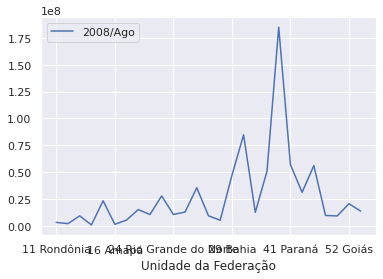

In [ ]:
# plotar um grafico

dados.plot(x='Unidade da Federação', y='2008/Ago')

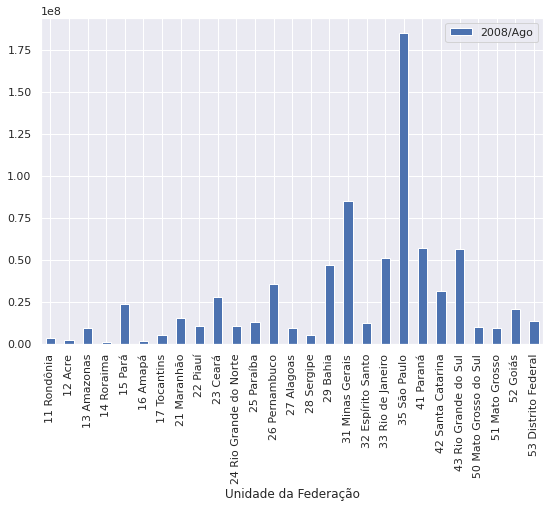

In [ ]:
dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))

Para alterar a formatação dos dados dos eixos, Ticker: https://matplotlib.org/3.2.1/gallery/ticks_and_spines/tick-formatters.html

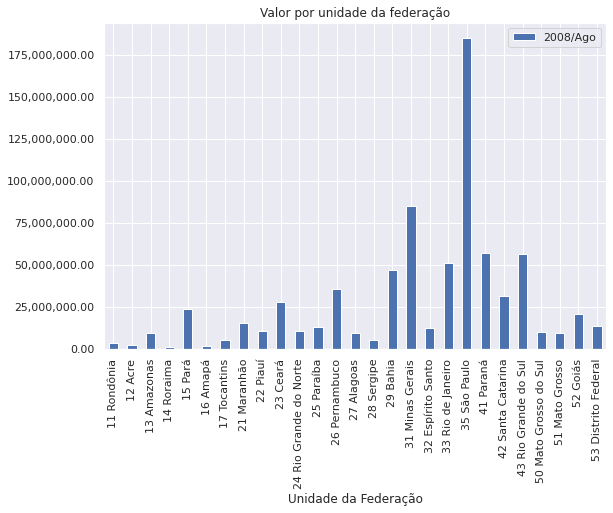

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) # formatando os valores do eixo y

plt.title('Valor por unidade da federação')
plt.show()

## Desafios Aula 01

### 1: Fazer um título mais adequado

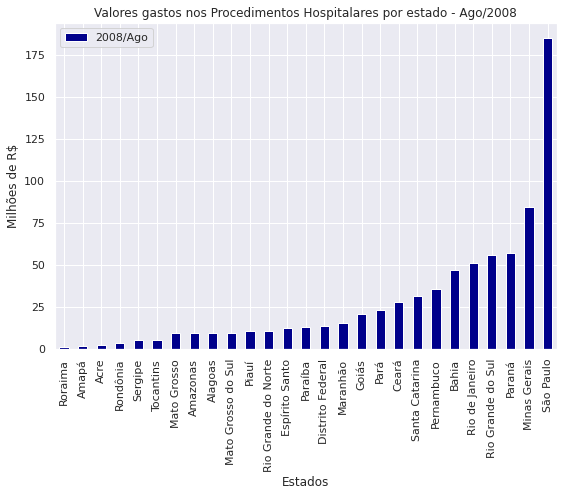

In [ ]:
# Título mais adequado

# salvar os dados de 2008/Ago em uma variavel e ordenar os dados
ago_2008 = dados[['Unidade da Federação', '2008/Ago']].sort_values('2008/Ago')

# formatar os nomes dos estados (tirando os numeros)
ago_2008['Unidade da Federação'] = ago_2008['Unidade da Federação'].str.slice(start=3)

# colocar milhões como unidade no eixo y
ago_2008['2008/Ago'] = ago_2008['2008/Ago']/(10**6)

# definir a paleta de cores

# criar o grafico
ax = ago_2008.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6), color='darkblue')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) # formatando os valores do eixo y

# colocar os valores dos ticks do eixo x na diagonal

# legendas dos eixos e dos graficos
plt.title('Valores gastos nos Procedimentos Hospitalares por estado - Ago/2008')
ax.set_xlabel('Estados')
ax.set_ylabel('Milhões de R$')
plt.show()

### 2: Fazer a mesma análise para o mês mais recente

In [ ]:
# Análise para o mês mais recente

# checando os dados que vamos analisar para saber se estão completos
dados['2020/Ago'].sort_values()

3      2826486.18
5      2946398.44
1      3640142.82
6      8361667.72
14    11014180.89
0     11724448.64
2     15826749.72
24    19569006.96
23    19832427.74
13    19989024.79
11    23195247.51
8     25653575.18
26    26526196.39
10    27577456.30
7     31647078.06
17    32739893.45
4     43843416.97
25    46465715.82
9     61399440.40
21    65278757.97
12    76820023.55
15    83437713.18
18    96163369.66
22   101478301.42
20   129529222.48
16   170780199.08
19   349178838.08
Name: 2020/Ago, dtype: float64

Text(0, 0.5, 'Valor em R$')

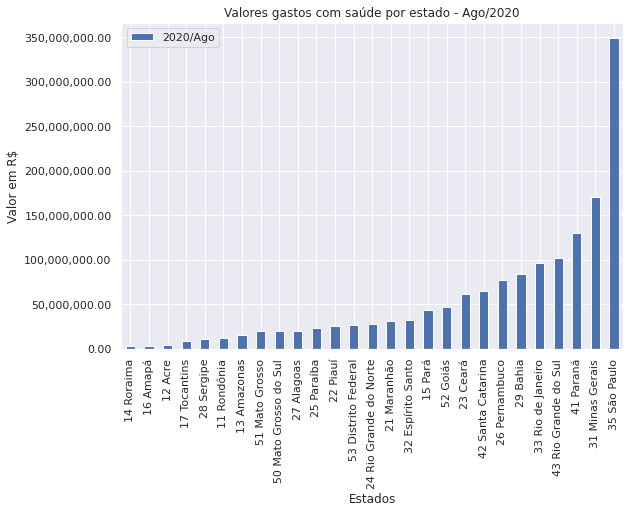

In [ ]:
# gráfico
ax = dados.sort_values('2020/Ago', ascending=True).plot(x='Unidade da Federação', y='2020/Ago', kind='bar', figsize=(9,6))

# formatando os valores do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}')) 

ax.set_title('Valores gastos com saúde por estado - Ago/2020')
ax.set_xlabel('Estados')
ax.set_ylabel('Valor em R$')